# TIM - TP 7 : Détection de points d'intêrets

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import cv2
import itertools
from scipy.ndimage.interpolation import shift

path_base =  '..//Base_images//'
# source des équations : https://courses.cs.washington.edu/courses/cse576/06sp/notes/HarrisDetector.pdf

In [5]:
b = np.array([1,2,3,4])
c = np.array([0,0,0,0,0,0])


RuntimeError: output shape not correct

# 1- Détecteur de Harris - prise en main

Dans l'image, certains points se distinguent par leur intensité par rapport à leur voisinage indiquant une variation brutale de l'intensité des niveaux de gris et/ou le changement d'orientation d'une courbe (point d'inflexion ou coin). Il existe plusieurs détecteurs de points d'intérêt. On se propose d'implémenter ici le détecteur de Harris. Celui-ci considère les différences (au carré) d'intensité autour d'un point et ce pour tous les points de l'image. Etant donnée une image I et un voisinage carré de taille 2n + 1, une image E est créée selon la définition suivante : 

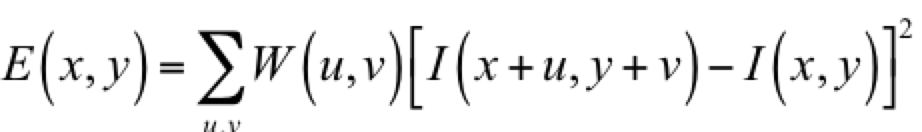

Où w est un filtre moyenneur ou Gaussien (à vous de choisir)

1. Pour chaque pixel (x,y) de l'image img sur un voisinage W de taille 3x3, écrire une fonction qui calcule et affiche E correspondant
2. Appliquer votre fonction sur l'image "lena_gray"

In [31]:
# A compléter
def E(u,v,img):
    grad_img = np.power(shift(img,(u,v)).astype(np.int32)-img.astype(np.int32),2)
    kernel_mean_filter = np.full((3,3),1/9)
    return cv2.filter2D(grad_img,-1,kernel_mean_filter)

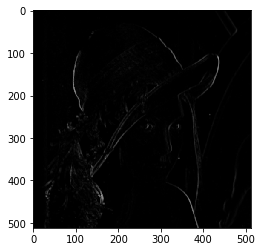

In [37]:
img = cv2.imread(path_base+'lena_gray.tif',-1)
img.shape
new_img = E(0,1,img)
plt.imshow(new_img,'gray')

# 2-  Algorithme de Harris

Le principe de Harris est de calculer les changements d’intensité dans l’image dans toutes les directions. Trois situations en découlent du calcul de E 

- Situation 1 : L’intensité est approximativement constante dans la zone image considérée : la fonction E prendra alors de faibles valeurs dans toutes les directions (x,y).
- Situation 2 : La zone image considérée contient un contour rectiligne : la fonction E prendra alors de faibles valeurs pour des déplacements (x,y) le long du contour et de fortes valeurs pour des déplacements perpendiculaires au contour.
- Situation 3 : La zone image considérée contient un coin ou un point isolé  (point d’intérêt) : la fonction E prendra de fortes valeurs dans toutes les directions.

Le calcul des valeurs selon les directions se fait naturellement par le calcul es dérivées directionnelles en chaque pixel. 

1. Créer une fonction Harris_Corner_detector(img) qui retourne dans un premier temps les grandients de l'image, horizontal et vertical 

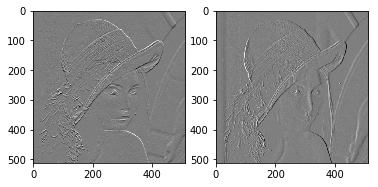

In [42]:
def Harris_Corner_detector(img):
    return np.gradient(img.astype(np.float))
Ix,Iy = Harris_Corner_detector(img)
plt.subplot(121)
plt.imshow(Ix,'gray')
plt.subplot(122)
plt.imshow(Iy,'gray')

2. Incorporer à votre fonction la matrice M qui est une approxiamtion bilinéaire de la fonction E.

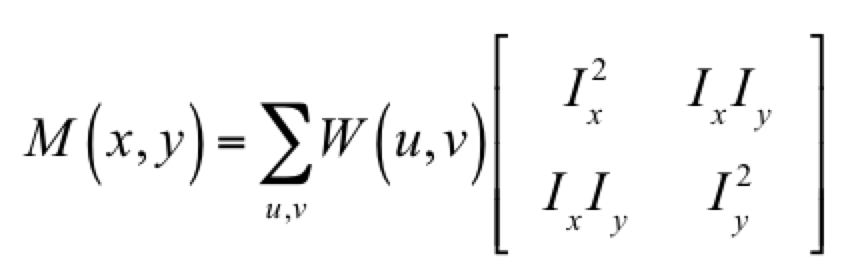



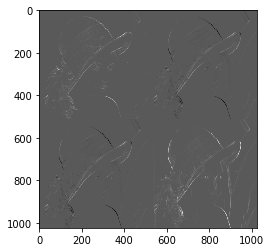

In [48]:
def M(Ix,Iy):
    A = np.power(Ix.astype(np.int32),2)
    B = np.power(Iy.astype(np.int32),2)
    C = Ix*Iy
    tmp = np.block([[A,C],
                   [C,B]])
    kernel_mean_filter = np.full((3,3),1/9)
    return cv2.filter2D(tmp,-1,kernel_mean_filter)
M = M(Ix,Iy)
plt.imshow(M,'gray')

La nature du pixel dépendra des valeurs propres de M : 

- Si les deux valeurs propres sont proches et larges, E croit dans toutes les directions, le pixel est donc un coin
- Si la deuxièmes valeur propre est très grande par rapport à la première valeur propre, le pixel appartien à un contour horizontal 
- Si la première valeur propre est très grande par rapport à la deuxième valeur propre, le pixel appartien à un contour vertical
- Si les deux valeurs propres sont très faibles, alors E ne varie pas et est presque constant dans toutes les directions, alors le pixel appartient à une zone homogène

Ces quatre cas de figures sont évalués par la mesure de la réponse R qui n'est autre qu'un indicateur d'existance de point d'intérêt :

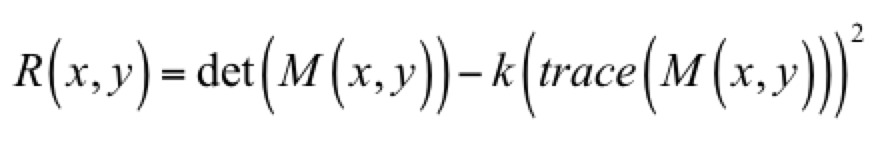

où k est une valeur empirique entre 0.04 et 0.06

3. Incorporer le calcul de la réponse R pour chaque pixel. La sortie de votre fonction retourne à présent l'image R (affichée en couleur de préférence)
4. Appliquer votre fonction à nouveau sur l'image Lena_gray. Que remarquez vous. 


In [ ]:
##

# 3-  Application

Les points d'intérêts sont les pixels pour lesquels R>0 (R<0 : contour, abs(R) très petit: zone homogène)
1. Créer une image 150x150 comportant un carré noir sur fond blanc (ou télécharger une image d'un échequier en niveau de gris)
2. Améliorer votre fonction en retournant l'image originale avec les points d'intérêt dessus.
3. Appliquer votre nouvelle fonction pour détecter les quatre coins de l'image

In [2]:
#

L'importance du point d'intérêt dépend de la valeur de R>0. Plus R est grand, plus le coin est important.

3. Corriger votre fonction en Harris_Corner_detector(img,N)où N est le nombre de points d'intérêts à détecter. 
4. Appliquer votre nouvelle fonction sur l'image lena_gray pour détecter les 50 points d'intérêts les plus importants. 

In [3]:
#

# 4 - Analyse

1. A quoi pourrait servir la détection de points d'intérêt dans une image
2. A quoi sert la multiplication de la matrice M (ou de la fonction E) par la Gaussienne (ou le moyenneur) W.